Telecom Churn Analyasis

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [66]:
df = pd.read_csv('/content/1730285168-TelecomCustomerChurn.csv')

In [67]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])
df.drop('customerID', axis=1, inplace=True)

In [68]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
cat_cols = df.select_dtypes(include='object').columns


In [69]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

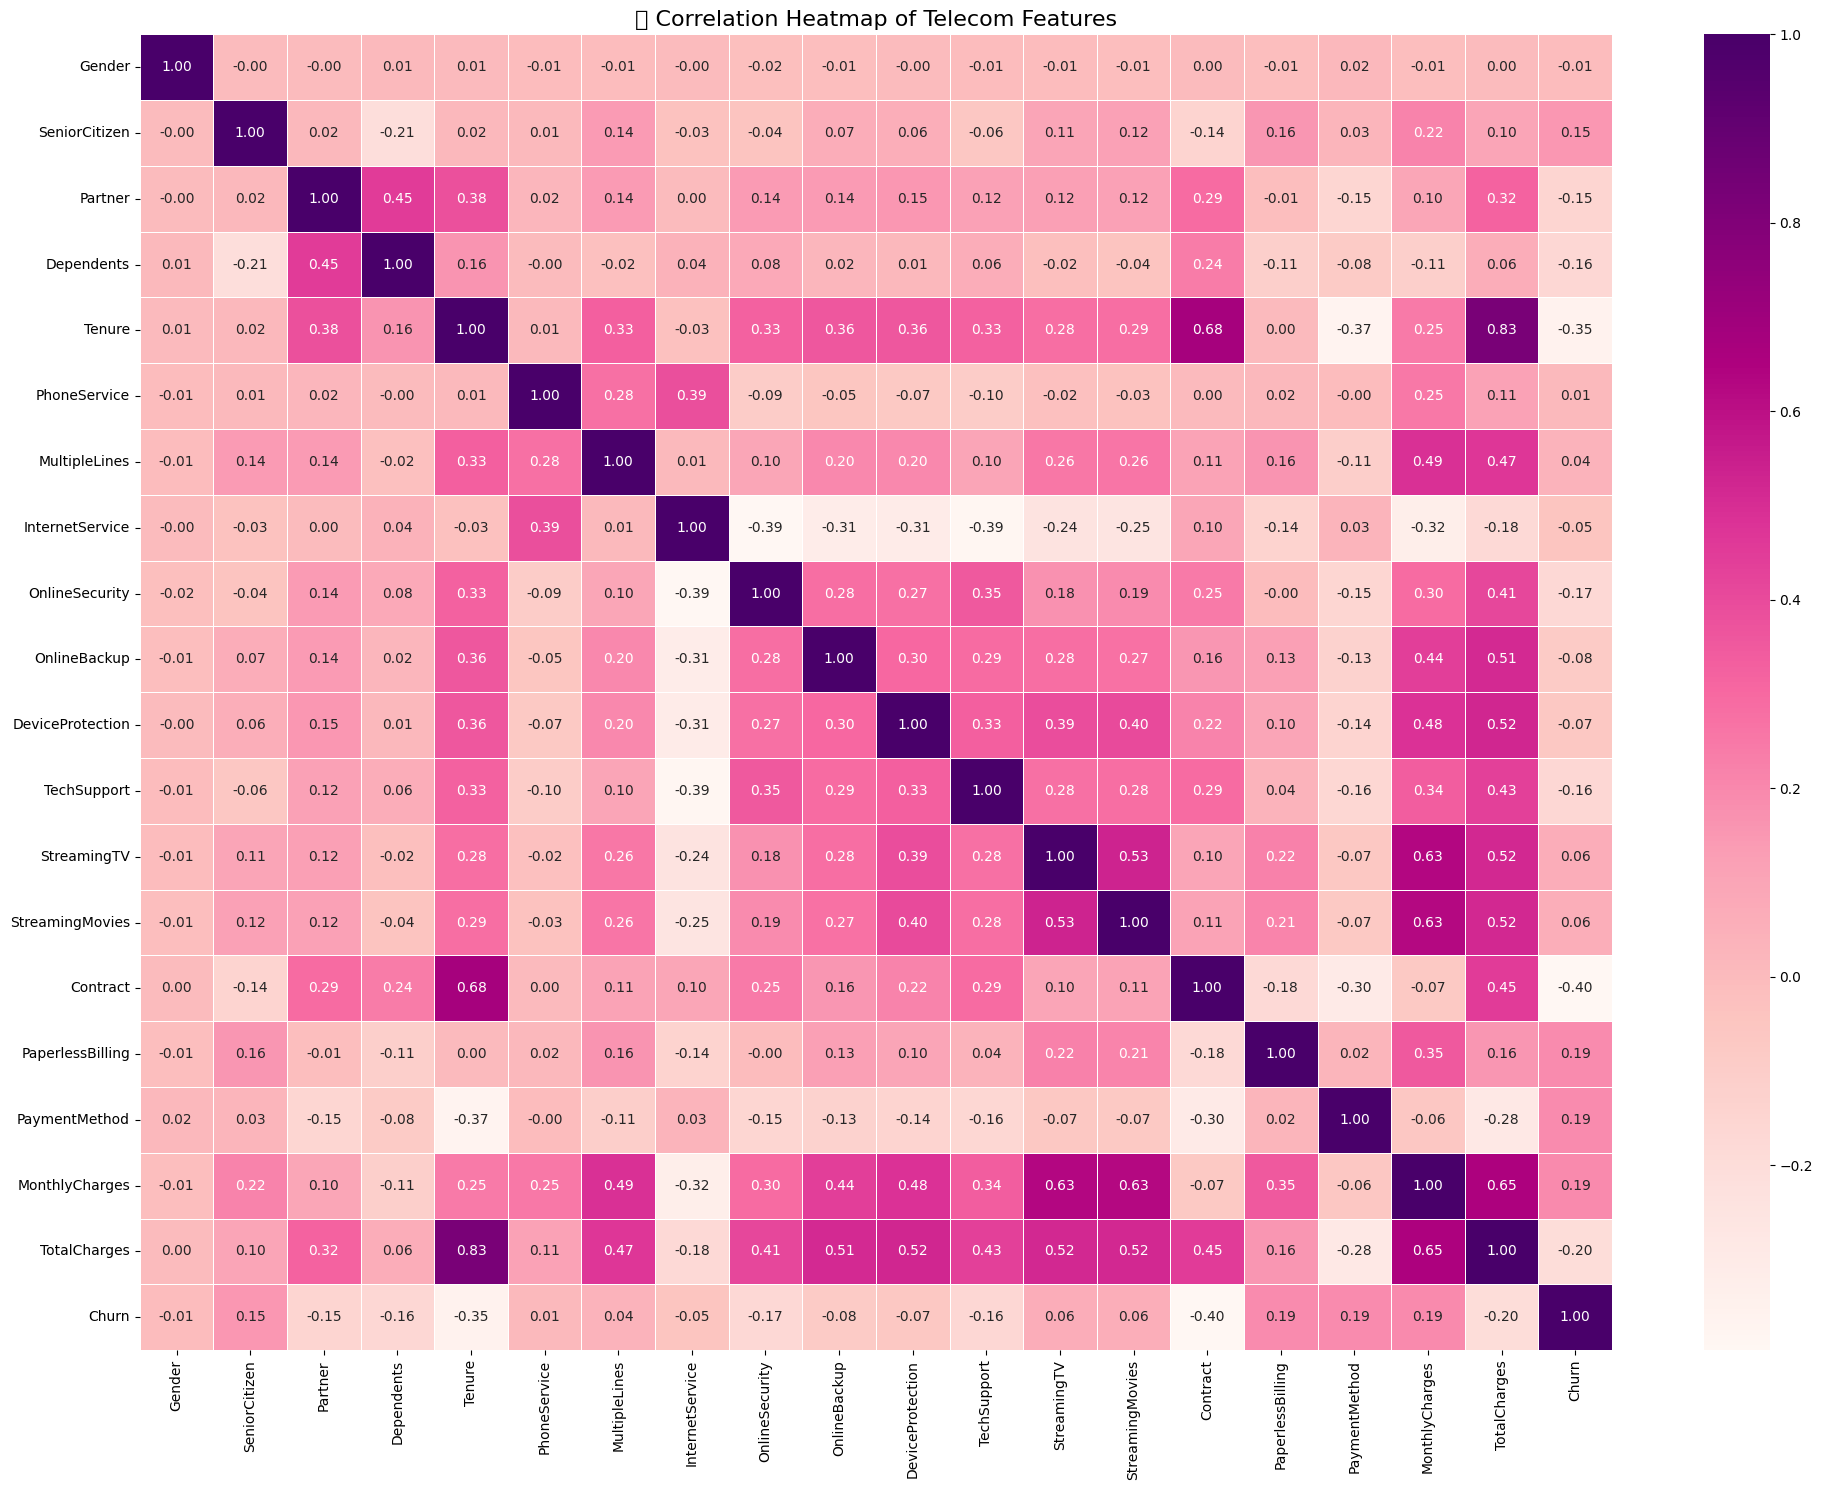

In [70]:
plt.figure(figsize=(20, 15))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdPu', linewidths=0.5, annot_kws={'size': 10})
plt.title("📊 Correlation Heatmap of Telecom Features", fontsize=16)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


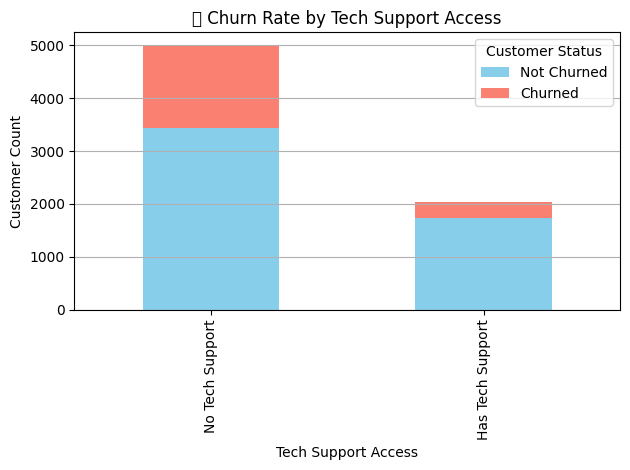

In [71]:
if 'TechSupport' in df.columns:
    tech_support_churn = pd.crosstab(df['TechSupport'], df['Churn'])
    tech_support_churn.columns = ['Not Churned', 'Churned']
    tech_support_churn.index = ['No Tech Support', 'Has Tech Support']

    tech_support_churn.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
    plt.ylabel("Customer Count")
    plt.xlabel("Tech Support Access")
    plt.title("📉 Churn Rate by Tech Support Access")
    plt.legend(title="Customer Status")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

In [72]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [76]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:,1]

    print(f"\n{name} Evaluation")
    print("-" * 40)
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")


Random Forest Evaluation
----------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.61      0.48      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407

ROC AUC Score: 0.8113510827194558

Logistic Regression Evaluation
----------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.63      0.56      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407

ROC AUC Score: 0.8345054381868915


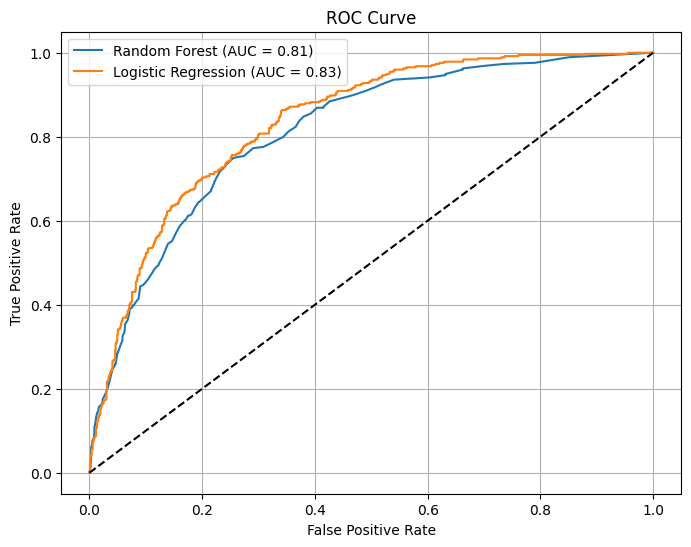

In [77]:
plt.figure(figsize=(8, 6))
evaluate_model(rf, "Random Forest")
evaluate_model(lr, "Logistic Regression")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


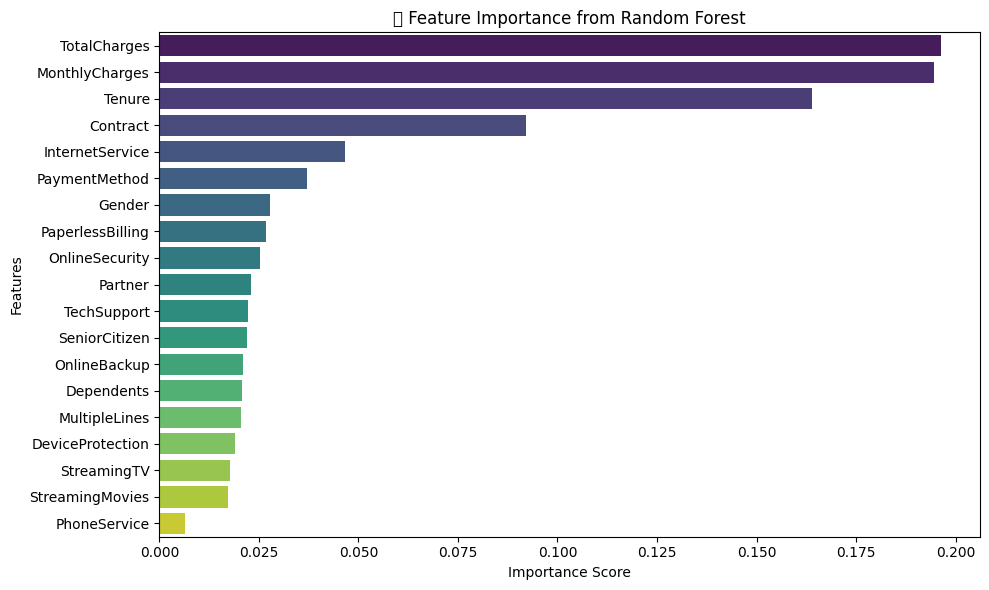

In [78]:
feat_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance, y=feat_importance.index, palette='viridis')
plt.title("🔍 Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
